In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# READ TXT
products_subsets = pd.read_csv('20x10.txt', delimiter = " ", header=None)
products_subsets

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1,68.24,0.0,12.41,2,7.06,0.0,0.06,6,37.65,...,21.31,18,24.71,0.00,1.53,19,54.12,0.0,7.49,1896.4706
1,1,87.06,0.0,18.10,2,11.76,0.0,0.10,3,14.12,...,11.05,16,38.82,0.00,3.67,17,92.94,0.0,21.82,1994.9412
2,0,10.59,0.0,0.03,1,75.29,0.0,14.86,3,15.29,...,30.60,15,63.53,0.00,9.41,16,28.24,0.0,2.44,1895.6471
3,2,5.88,0.0,0.05,4,40.00,0.0,4.93,5,72.94,...,7.72,16,32.94,0.00,3.02,19,64.71,0.0,9.89,1889.4706
4,1,76.47,0.0,15.04,2,8.24,0.0,0.08,3,15.29,...,10.34,16,55.29,0.00,5.78,18,23.53,0.0,1.58,1851.7647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,0,7.06,0.0,0.03,3,15.29,0.0,0.33,8,32.94,...,11.21,17,95.29,5.88,28.96,19,77.65,0.0,13.96,1811.2941
18936,0,9.41,0.0,0.03,1,87.06,0.0,21.51,2,16.47,...,6.06,17,96.47,9.41,31.93,19,75.29,0.0,13.54,1814.4118
18937,2,10.59,0.0,0.11,4,75.29,0.0,12.12,6,54.12,...,26.03,18,31.76,0.00,2.31,19,83.53,0.0,15.45,1822.7647
18938,1,67.06,0.0,13.17,3,8.24,0.0,0.15,4,35.29,...,0.92,17,82.35,0.00,21.27,19,57.65,0.0,8.74,1780.8235


In [4]:
# NAME THE COLUMNS
products_subsets.columns = ['p1', 'p1_buyers_perc', 'p1_only_buyers_perc', 'p1_percentage_contribution',
              'p2', 'p2_buyers_perc', 'p2_only_buyers_perc', 'p2_percentage_contribution',
              'p3', 'p3_buyers_perc', 'p3_only_buyers_perc', 'p3_percentage_contribution',
              'p4', 'p4_buyers_perc', 'p4_only_buyers_perc', 'p4_percentage_contribution',
              'p5', 'p5_buyers_perc', 'p5_only_buyers_perc', 'p5_percentage_contribution',
              'p6', 'p6_buyers_perc', 'p6_only_buyers_perc', 'p6_percentage_contribution',
              'p7', 'p7_buyers_perc', 'p7_only_buyers_perc', 'p7_percentage_contribution',
              'p8', 'p8_buyers_perc', 'p8_only_buyers_perc', 'p8_percentage_contribution',
              'p9', 'p9_buyers_perc', 'p9_only_buyers_perc', 'p9_percentage_contribution',
              'p10', 'p10_buyers_perc', 'p10_only_buyers_perc', 'p10_percentage_contribution',
              'average_income']
products_subsets

,p1,p1_buyers_perc,p1_only_buyers_perc,p1_percentage_contribution,p2,p2_buyers_perc,p2_only_buyers_perc,p2_percentage_contribution,p3,p3_buyers_perc,...,p8_percentage_contribution,p9,p9_buyers_perc,p9_only_buyers_perc,p9_percentage_contribution,p10,p10_buyers_perc,p10_only_buyers_perc,p10_percentage_contribution,average_income
0,1,68.24,0.0,12.41,2,7.06,0.0,0.06,6,37.65,...,21.31,18,24.71,0.00,1.53,19,54.12,0.0,7.49,1896.4706
1,1,87.06,0.0,18.10,2,11.76,0.0,0.10,3,14.12,...,11.05,16,38.82,0.00,3.67,17,92.94,0.0,21.82,1994.9412
2,0,10.59,0.0,0.03,1,75.29,0.0,14.86,3,15.29,...,30.60,15,63.53,0.00,9.41,16,28.24,0.0,2.44,1895.6471
3,2,5.88,0.0,0.05,4,40.00,0.0,4.93,5,72.94,...,7.72,16,32.94,0.00,3.02,19,64.71,0.0,9.89,1889.4706
4,1,76.47,0.0,15.04,2,8.24,0.0,0.08,3,15.29,...,10.34,16,55.29,0.00,5.78,18,23.53,0.0,1.58,1851.7647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,0,7.06,0.0,0.03,3,15.29,0.0,0.33,8,32.94,...,11.21,17,95.29,5.88,28.96,19,77.65,0.0,13.96,1811.2941
18936,0,9.41,0.0,0.03,1,87.06,0.0,21.51,2,16.47,...,6.06,17,96.47,9.41,31.93,19,75.29,0.0,13.54,1814.4118
18937,2,10.59,0.0,0.11,4,75.29,0.0,12.12,6,54.12,...,26.03,18,31.76,0.00,2.31,19,83.53,0.0,15.45,1822.7647
18938,1,67.06,0.0,13.17,3,8.24,0.0,0.15,4,35.29,...,0.92,17,82.35,0.00,21.27,19,57.65,0.0,8.74,1780.8235


In [5]:
products_subsets['SetID'] = products_subsets.index
products_subsets

,p1,p1_buyers_perc,p1_only_buyers_perc,p1_percentage_contribution,p2,p2_buyers_perc,p2_only_buyers_perc,p2_percentage_contribution,p3,p3_buyers_perc,...,p9,p9_buyers_perc,p9_only_buyers_perc,p9_percentage_contribution,p10,p10_buyers_perc,p10_only_buyers_perc,p10_percentage_contribution,average_income,SetID
0,1,68.24,0.0,12.41,2,7.06,0.0,0.06,6,37.65,...,18,24.71,0.00,1.53,19,54.12,0.0,7.49,1896.4706,0
1,1,87.06,0.0,18.10,2,11.76,0.0,0.10,3,14.12,...,16,38.82,0.00,3.67,17,92.94,0.0,21.82,1994.9412,1
2,0,10.59,0.0,0.03,1,75.29,0.0,14.86,3,15.29,...,15,63.53,0.00,9.41,16,28.24,0.0,2.44,1895.6471,2
3,2,5.88,0.0,0.05,4,40.00,0.0,4.93,5,72.94,...,16,32.94,0.00,3.02,19,64.71,0.0,9.89,1889.4706,3
4,1,76.47,0.0,15.04,2,8.24,0.0,0.08,3,15.29,...,16,55.29,0.00,5.78,18,23.53,0.0,1.58,1851.7647,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,0,7.06,0.0,0.03,3,15.29,0.0,0.33,8,32.94,...,17,95.29,5.88,28.96,19,77.65,0.0,13.96,1811.2941,18935
18936,0,9.41,0.0,0.03,1,87.06,0.0,21.51,2,16.47,...,17,96.47,9.41,31.93,19,75.29,0.0,13.54,1814.4118,18936
18937,2,10.59,0.0,0.11,4,75.29,0.0,12.12,6,54.12,...,18,31.76,0.00,2.31,19,83.53,0.0,15.45,1822.7647,18937
18938,1,67.06,0.0,13.17,3,8.24,0.0,0.15,4,35.29,...,17,82.35,0.00,21.27,19,57.65,0.0,8.74,1780.8235,18938


In [6]:
# CREATE DATAFRAME WITH ONLY PRODUCTS AND INCOMES OF THESE PRODUCTS

prod_with_incomes = pd.DataFrame()
prod_with_incomes['SetID'] = products_subsets.index
prod_with_incomes['p1_income'] = (products_subsets['p1_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p2_income'] = (products_subsets['p2_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p3_income'] = (products_subsets['p3_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p4_income'] = (products_subsets['p4_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p5_income'] = (products_subsets['p5_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p6_income'] = (products_subsets['p6_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p7_income'] = (products_subsets['p7_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p8_income'] = (products_subsets['p8_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p9_income'] = (products_subsets['p9_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p10_income'] = (products_subsets['p10_percentage_contribution'] * products_subsets['average_income'] / 100)
prod_with_incomes['p1'] = products_subsets['p1']
prod_with_incomes['p2'] = products_subsets['p2']
prod_with_incomes['p3'] = products_subsets['p3']
prod_with_incomes['p4'] = products_subsets['p4']
prod_with_incomes['p5'] = products_subsets['p5']
prod_with_incomes['p6'] = products_subsets['p6']
prod_with_incomes['p7'] = products_subsets['p7']
prod_with_incomes['p8'] = products_subsets['p8']
prod_with_incomes['p9'] = products_subsets['p9']
prod_with_incomes['p10'] = products_subsets['p10']
prod_with_incomes

,SetID,p1_income,p2_income,p3_income,p4_income,p5_income,p6_income,p7_income,p8_income,p9_income,...,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
0,0,235.352001,1.137882,60.687059,3.603294,93.306354,205.198119,654.851298,404.137885,29.016000,...,1,2,6,7,8,13,14,17,18,19
1,1,361.084357,1.994941,5.984824,149.620590,112.913672,525.268018,38.701859,220.441003,73.214342,...,1,2,3,4,8,9,11,15,16,17
2,2,0.568694,281.693159,5.686941,114.307520,67.105907,394.294597,93.265837,580.068013,178.380392,...,0,1,3,4,8,9,10,14,15,16
3,3,0.944735,93.150901,265.092725,3.401047,407.936703,23.807330,638.830010,145.867130,57.062012,...,2,4,5,7,9,11,14,15,16,19
4,4,278.505411,1.481412,6.296000,165.732941,361.834822,526.641881,52.960470,191.472470,107.032000,...,1,2,3,4,5,9,11,15,16,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,18935,0.543388,5.977271,66.293364,153.235481,25.901506,99.258917,394.499855,203.046069,524.550771,...,0,3,8,10,11,12,13,15,17,19
18936,18936,0.544324,390.279978,2.721618,170.010386,44.634530,82.555737,124.831532,109.953355,579.341688,...,0,1,2,4,6,8,10,12,17,19
18937,18937,2.005041,220.919082,102.074823,6.926506,55.594323,407.387910,143.998411,474.465651,42.105865,...,2,4,6,7,11,13,16,17,18,19
18938,18938,234.534455,2.671235,71.767187,542.438838,63.931564,39.712364,107.561739,16.383576,378.781158,...,1,3,4,9,10,12,15,16,17,19


In [7]:
# MELT PROD_WITH_INCOMES. SAME SETID DIFFERENT PRODUCT KEEP IT INCOME. FOR EACH BASCKET EACH PRODUCT INCOME
melted_df1 = prod_with_incomes.melt(id_vars=['SetID','p1','p2','p3','p4','p5','p6','p7','p8','p9','p10']).sort_values(by=['SetID','variable'])
melted_df1

,SetID,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,variable,value
170460,0,1,2,6,7,8,13,14,17,18,19,p10_income,142.045648
0,0,1,2,6,7,8,13,14,17,18,19,p1_income,235.352001
18940,0,1,2,6,7,8,13,14,17,18,19,p2_income,1.137882
37880,0,1,2,6,7,8,13,14,17,18,19,p3_income,60.687059
56820,0,1,2,6,7,8,13,14,17,18,19,p4_income,3.603294
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94699,18939,0,4,5,6,7,9,11,15,16,19,p5_income,4.108530
113639,18939,0,4,5,6,7,9,11,15,16,19,p6_income,554.651483
132579,18939,0,4,5,6,7,9,11,15,16,19,p7_income,25.472883
151519,18939,0,4,5,6,7,9,11,15,16,19,p8_income,166.477615


In [8]:
# MELT THE PRODUCT IDS OF EACH SETID
melted_df2 = prod_with_incomes.melt(id_vars=['SetID'], value_vars=['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10']).sort_values(by=['SetID','variable']).rename(columns = {'variable': 'product', 'value': 'prod_id'})
melted_df2

,SetID,product,prod_id
0,0,p1,1
170460,0,p10,19
18940,0,p2,2
37880,0,p3,6
56820,0,p4,7
...,...,...,...
94699,18939,p5,7
113639,18939,p6,9
132579,18939,p7,11
151519,18939,p8,15


In [9]:
# JOIN BY ROWS / CONCAT TWO DATAFRAMES melted_df1 AND melted_df2
final_melted_df = pd.concat([melted_df1, melted_df2], axis=1)
final_melted_df

,SetID,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,variable,value,SetID,product,prod_id
0,0,1,2,6,7,8,13,14,17,18,19,p1_income,235.352001,0,p1,1
1,1,1,2,3,4,8,9,11,15,16,17,p1_income,361.084357,1,p1,1
2,2,0,1,3,4,8,9,10,14,15,16,p1_income,0.568694,2,p1,0
3,3,2,4,5,7,9,11,14,15,16,19,p1_income,0.944735,3,p1,2
4,4,1,2,3,4,5,9,11,15,16,18,p1_income,278.505411,4,p1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189395,18935,0,3,8,10,11,12,13,15,17,19,p10_income,252.856656,18935,p10,19
189396,18936,0,1,2,4,6,8,10,12,17,19,p10_income,245.671358,18936,p10,19
189397,18937,2,4,6,7,11,13,16,17,18,19,p10_income,281.617146,18937,p10,19
189398,18938,1,3,4,9,10,12,15,16,17,19,p10_income,155.643974,18938,p10,19


In [10]:
# CLEAR AND PRODUCE DATAFRAME THAT IS GOING TO BE ENCODED AND APPLIED TO THE MODELS
products_subsets_model = final_melted_df.drop(columns=['variable', 'product']).rename(columns={'value': 'prod_income'})
products_subsets_model = products_subsets_model[["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8", "p9", "p10", "prod_income", "prod_id"]]
products_subsets_model

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,prod_income,prod_id
0,1,2,6,7,8,13,14,17,18,19,235.352001,1
1,1,2,3,4,8,9,11,15,16,17,361.084357,1
2,0,1,3,4,8,9,10,14,15,16,0.568694,0
3,2,4,5,7,9,11,14,15,16,19,0.944735,2
4,1,2,3,4,5,9,11,15,16,18,278.505411,1
...,...,...,...,...,...,...,...,...,...,...,...,...
189395,0,3,8,10,11,12,13,15,17,19,252.856656,19
189396,0,1,2,4,6,8,10,12,17,19,245.671358,19
189397,2,4,6,7,11,13,16,17,18,19,281.617146,19
189398,1,3,4,9,10,12,15,16,17,19,155.643974,19


In [11]:
# ENCODE COLUMNS THAT CONSIST PRODUCTS
encoded = pd.get_dummies(products_subsets_model, columns = ['prod_id','p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
encoded

,prod_income,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,...,p10_10,p10_11,p10_12,p10_13,p10_14,p10_15,p10_16,p10_17,p10_18,p10_19
0,235.352001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,361.084357,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.568694,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.944735,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,278.505411,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189395,252.856656,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
189396,245.671358,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
189397,281.617146,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
189398,155.643974,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# A QUESTION

# Apply Regression Models (A1)

### Linear Regression

In [12]:
X = encoded.iloc[:, 1:].values
y = encoded.iloc[:, 0].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train) # connect model with data

LinearRegression()

In [15]:
y_pred = linear_regression.predict(X_test)
y_pred

array([ 27.8125, 233.0625,  98.0625, ...,   3.3125, 311.375 ,  62.8125])

In [16]:
Linear_Regr_MSE = mean_squared_error(y_test, y_pred)
Linear_Regr_Score = linear_regression.score(X_test,y_test)

print(f"The MSE is: {Linear_Regr_MSE}")
print(f"The Score is: {Linear_Regr_Score}")

The MSE is: 1987.4252859156381
The Score is: 0.9361014435562992


### SVM

In [17]:
X = encoded.iloc[:, 1:].values
y = encoded.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

SVM_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
SVM_regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [18]:
y_pred = SVM_regr.predict(X_test)
y_pred

SVM_MSE = mean_squared_error(y_test, y_pred)
SVM_Score = SVM_regr.score(X_test,y_test)

print(f"The MSE is: {SVM_MSE}")
print(f"The Score is: {SVM_Score}")

The MSE is: 4781.2772931049785
The Score is: 0.8462751182891903


### ΚΝΝ

In [19]:
X = encoded.iloc[:, 1:].values
y = encoded.iloc[:, 0].values

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=5)

# Fit and score
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:
y_pred = knn.predict(X_test)
y_pred

KNN_MSE = mean_squared_error(y_test, y_pred)
KNN_Score = knn.score(X_test,y_test)

print(f"The MSE is: {KNN_MSE}")
print(f"The Score is: {KNN_Score}")

The MSE is: 30879.871115531616
The Score is: 0.010330906165968212


### Neural Network

In [21]:
X = encoded.iloc[:, 1:].values
y = encoded.iloc[:, 0].values

# X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
NN_regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

y_pred = NN_regr.predict(X_test)

Neural_Net_MSE = mean_squared_error(y_test, y_pred)
Neural_Net_Score = NN_regr.score(X_test,y_test)

print(f"The MSE is: {Neural_Net_MSE}")
print(f"The Score is: {Neural_Net_Score}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The MSE is: 549.5350281984486
The Score is: 0.9822892298501783


# Plots for A1 Question

In [22]:
Scores_A = {'Linear Regression': Linear_Regr_Score*100, 'SVM': SVM_Score*100, 'KNN': KNN_Score*100, 'Neural Network': Neural_Net_Score*100}
Scores_A

{'Linear Regression': 93.61014435562993,
 'SVM': 84.62751182891904,
 'KNN': 1.0330906165968212,
 'Neural Network': 98.22892298501783}

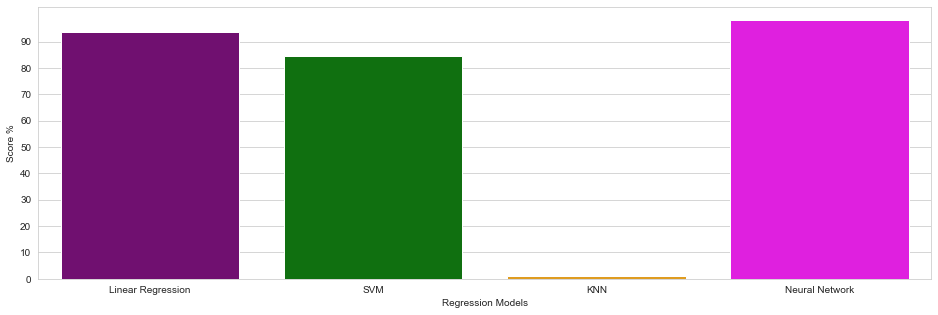

In [23]:
# PROT THE SCORES OF REGRESSION MODELS

colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Score %")
plt.xlabel("Regression Models")
sns.barplot(x=list(Scores_A.keys()), y=list(Scores_A.values()), palette=colors)
plt.show()

# Apply Classification Models (A2)

### A2 Without Encoding

In [24]:
products_subsets_model = products_subsets_model[['prod_id', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'prod_income']]
products_subsets_model

,prod_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,prod_income
0,1,1,2,6,7,8,13,14,17,18,19,235.352001
1,1,1,2,3,4,8,9,11,15,16,17,361.084357
2,0,0,1,3,4,8,9,10,14,15,16,0.568694
3,2,2,4,5,7,9,11,14,15,16,19,0.944735
4,1,1,2,3,4,5,9,11,15,16,18,278.505411
...,...,...,...,...,...,...,...,...,...,...,...,...
189395,19,0,3,8,10,11,12,13,15,17,19,252.856656
189396,19,0,1,2,4,6,8,10,12,17,19,245.671358
189397,19,2,4,6,7,11,13,16,17,18,19,281.617146
189398,19,1,3,4,9,10,12,15,16,17,19,155.643974


In [25]:
X = products_subsets_model.loc[:, products_subsets_model.columns != 'prod_income']
y = products_subsets_model.iloc[:,-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
# TAKE THE TRAINING SET AND THE MEAN INCOME PER PRODUCT 
training_set = X_train.copy()
training_set['prod_income'] = y_train.copy()
training_set['mean_income_per_prod'] = training_set.groupby('prod_id')['prod_income'].transform('mean')
training_set

,prod_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,prod_income,mean_income_per_prod
57720,6,0,1,2,6,7,8,9,15,16,19,49.148975,60.534992
90479,11,1,3,4,9,11,12,15,16,17,18,42.384283,40.708309
117935,15,3,4,9,10,13,14,15,16,17,18,129.880449,179.720292
71211,4,0,1,3,4,8,10,12,13,16,17,194.224793,153.962483
116181,13,2,3,4,7,8,10,13,14,16,18,353.133464,261.337709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,6,1,2,3,6,7,8,12,16,17,19,53.956940,60.534992
109259,9,0,1,3,6,8,9,11,12,17,18,553.641893,485.002299
50057,6,2,5,6,7,10,11,12,13,16,18,91.317586,60.534992
5192,1,1,2,5,6,9,10,12,13,15,16,276.104015,318.431577


In [28]:
# TAKE THE TEST SET
test_set = X_test.copy()
test_set['prod_income'] = y_test.copy()
test_set

,prod_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,prod_income
108837,11,0,3,4,5,8,11,14,15,17,18,45.173324
139199,15,2,3,6,7,10,11,13,15,16,19,234.742943
162913,16,0,1,5,6,8,10,13,15,16,18,76.550436
43570,2,0,1,2,3,6,10,12,14,15,18,3.762582
80621,9,3,4,6,7,9,10,12,16,17,19,583.673922
...,...,...,...,...,...,...,...,...,...,...,...,...
151057,12,0,4,5,8,9,10,11,12,17,19,109.044107
53700,5,1,2,5,6,12,13,14,15,16,19,355.717483
23606,6,5,6,7,8,9,12,13,14,17,19,26.397929
47835,5,0,1,5,6,7,11,13,14,18,19,354.553041


In [29]:
# DATAFRAME WITH THE PROD_ID AND THE MEAN INCOME 
training_set_prod_id_with_mean = training_set.groupby('prod_id')['prod_income'].agg([pd.np.mean])

# JOIN training_set_prod_id_with_mean AND test_set BY prod_id
test_set_with_mean_income_per_prod = pd.merge(training_set_prod_id_with_mean, test_set, left_on='prod_id', right_on='prod_id', how='inner')
test_set_with_mean_income_per_prod = test_set_with_mean_income_per_prod.rename(columns={'mean': 'mean_income_per_prod'})
test_set_with_mean_income_per_prod

<ipython-input-29-c9bb9e5f352c>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  training_set_prod_id_with_mean = training_set.groupby('prod_id')['prod_income'].agg([pd.np.mean])


,prod_id,mean_income_per_prod,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,prod_income
0,0,0.636845,0,1,2,4,5,7,12,15,16,19,0.709906
1,0,0.636845,0,2,4,5,8,12,14,15,18,19,1.006971
2,0,0.636845,0,3,8,9,10,13,14,15,17,18,0.376235
3,0,0.636845,0,4,5,6,9,11,13,14,17,19,0.417694
4,0,0.636845,0,2,8,10,11,14,15,16,17,18,0.364200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,19,204.708670,2,3,5,7,10,11,16,17,18,19,245.122359
37876,19,204.708670,2,5,6,7,10,11,16,17,18,19,190.293266
37877,19,204.708670,0,3,7,9,10,13,14,16,17,19,125.547217
37878,19,204.708670,1,2,4,5,6,8,9,17,18,19,162.552530


In [30]:
# CHANGE THE LABELS INTO BINARY WITH THE NECESSARY CONDITION (CHECKING IF THE PRODUCT INCOME IS BIGER THAN THE CALCULATED MEAN UNDER TRAINING SET)

trainset_labels = (training_set['prod_income'] > training_set['mean_income_per_prod']).astype(int)
testset_labels = (test_set_with_mean_income_per_prod['prod_income'] > test_set_with_mean_income_per_prod['mean_income_per_prod']).astype(int)

In [31]:
y_train = trainset_labels
y_test = testset_labels

In [32]:
test_set = test_set_with_mean_income_per_prod.drop(columns=['mean_income_per_prod'])
X_test = test_set.drop(columns=['prod_income'])
X_test

,prod_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
0,0,0,1,2,4,5,7,12,15,16,19
1,0,0,2,4,5,8,12,14,15,18,19
2,0,0,3,8,9,10,13,14,15,17,18
3,0,0,4,5,6,9,11,13,14,17,19
4,0,0,2,8,10,11,14,15,16,17,18
...,...,...,...,...,...,...,...,...,...,...,...
37875,19,2,3,5,7,10,11,16,17,18,19
37876,19,2,5,6,7,10,11,16,17,18,19
37877,19,0,3,7,9,10,13,14,16,17,19
37878,19,1,2,4,5,6,8,9,17,18,19


### SVM

In [33]:
svm = SVC(kernel='linear', random_state = 0)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [34]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 58.57708553326294


### Logistic Regression

In [35]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred = logisticRegr.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 58.95987328405491


### KNN 

In [37]:
KNN = KNeighborsClassifier(n_neighbors = 5) 
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 69.6726504751848


### A2 With Encoding (get_dummies)

In [39]:
prod_id_df = products_subsets_model["prod_id"]
prod_id_df

0          1
1          1
2          0
3          2
4          1
          ..
189395    19
189396    19
189397    19
189398    19
189399    19
Name: prod_id, Length: 189400, dtype: int64

In [40]:
# ENCODE COLUMNS THAT CONSIST PRODUCTS
encoded = pd.get_dummies(products_subsets_model, columns = ['prod_id', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
encoded

,prod_income,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,...,p10_10,p10_11,p10_12,p10_13,p10_14,p10_15,p10_16,p10_17,p10_18,p10_19
0,235.352001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,361.084357,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.568694,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.944735,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,278.505411,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189395,252.856656,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
189396,245.671358,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
189397,281.617146,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
189398,155.643974,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
encoded['prod_id'] = prod_id_df
encoded

,prod_income,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,...,p10_11,p10_12,p10_13,p10_14,p10_15,p10_16,p10_17,p10_18,p10_19,prod_id
0,235.352001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,361.084357,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.568694,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.944735,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,278.505411,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189395,252.856656,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19
189396,245.671358,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19
189397,281.617146,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19
189398,155.643974,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19


In [42]:
X = encoded.drop(['prod_income'], axis=1)
y = encoded.iloc[:,0].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [44]:
# AFTER SPLITING THE DATA CALCULATE THE MEAN OF PRODUCT INCOME ON TRAINING SET

training_set = X_train.copy()
training_set['prod_income'] = y_train.copy()
training_set['mean_income_per_prod'] = training_set.groupby('prod_id')['prod_income'].transform('mean')
training_set

,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,prod_id_9,...,p10_13,p10_14,p10_15,p10_16,p10_17,p10_18,p10_19,prod_id,prod_income,mean_income_per_prod
57720,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,6,49.148975,60.534992
90479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,11,42.384283,40.708309
117935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,15,129.880449,179.720292
71211,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,4,194.224793,153.962483
116181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,13,353.133464,261.337709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,6,53.956940,60.534992
109259,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,9,553.641893,485.002299
50057,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,6,91.317586,60.534992
5192,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,276.104015,318.431577


In [45]:
# CREATE DATAFRAME WITH THE TEST SET

test_set = X_test.copy()
test_set['prod_income'] = y_test.copy()
test_set

,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,prod_id_9,...,p10_12,p10_13,p10_14,p10_15,p10_16,p10_17,p10_18,p10_19,prod_id,prod_income
108837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,11,45.173324
139199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,15,234.742943
162913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,16,76.550436
43570,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,3.762582
80621,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,9,583.673922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,12,109.044107
53700,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,5,355.717483
23606,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,6,26.397929
47835,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,5,354.553041


In [46]:
# CREATE DATAFRAME WITH THE 20 PRODUCT IDS AND THEIR MEAN INCOME
training_set_prod_id_with_mean = training_set.groupby('prod_id')['prod_income'].agg([pd.np.mean])

# JOIN training_set_prod_id_with_mean AND test_set BY prod_id
test_set_with_mean_income_per_prod = pd.merge(training_set_prod_id_with_mean, test_set, left_on='prod_id', right_on='prod_id', how='inner')
test_set_with_mean_income_per_prod = test_set_with_mean_income_per_prod.rename(columns={'mean': 'mean_income_per_prod'})
test_set_with_mean_income_per_prod

<ipython-input-46-c9bb9e5f352c>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  training_set_prod_id_with_mean = training_set.groupby('prod_id')['prod_income'].agg([pd.np.mean])


,prod_id,mean_income_per_prod,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,...,p10_11,p10_12,p10_13,p10_14,p10_15,p10_16,p10_17,p10_18,p10_19,prod_income
0,0,0.636845,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.709906
1,0,0.636845,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.006971
2,0,0.636845,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.376235
3,0,0.636845,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.417694
4,0,0.636845,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.364200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,19,204.708670,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,245.122359
37876,19,204.708670,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,190.293266
37877,19,204.708670,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,125.547217
37878,19,204.708670,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,162.552530


In [47]:
# CHANGE THE LABELS INTO BINARY WITH THE NECESSARY CONDITION (CHECKING IF THE PRODUCT INCOME IS BIGER THAN THE CALCULATED MEAN UNDER TRAINING SET)

trainset_labels = (training_set['prod_income'] > training_set['mean_income_per_prod']).astype(int)
testset_labels = (test_set_with_mean_income_per_prod['prod_income'] > test_set_with_mean_income_per_prod['mean_income_per_prod']).astype(int)

In [48]:
y_train = trainset_labels
y_test = testset_labels

In [49]:
test_set = test_set_with_mean_income_per_prod.drop(columns=['prod_id','mean_income_per_prod'])
X_test = test_set.drop(columns=['prod_income'])
X_train = X_train.drop(['prod_id'], axis=1)
X_train

,prod_id_0,prod_id_1,prod_id_2,prod_id_3,prod_id_4,prod_id_5,prod_id_6,prod_id_7,prod_id_8,prod_id_9,...,p10_10,p10_11,p10_12,p10_13,p10_14,p10_15,p10_16,p10_17,p10_18,p10_19
57720,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
90479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
71211,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
116181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
109259,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
50057,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5192,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Logistic Regression

In [50]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = logisticRegr.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 70.34318901795143


### KNN

In [52]:
KNN = KNeighborsClassifier(n_neighbors = 5) 
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 71.1325237592397


### SVM

In [54]:
svm = SVC(kernel='linear', random_state = 0)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [55]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 70.41710665258711


# B Question

# Apply Regression Models (B1)

In [56]:
products_subsets_model_B = products_subsets[["p1","p2","p3","p4","p5","p6","p7","p8","p9","p10","average_income"]]
products_subsets_model_B

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,average_income
0,1,2,6,7,8,13,14,17,18,19,1896.4706
1,1,2,3,4,8,9,11,15,16,17,1994.9412
2,0,1,3,4,8,9,10,14,15,16,1895.6471
3,2,4,5,7,9,11,14,15,16,19,1889.4706
4,1,2,3,4,5,9,11,15,16,18,1851.7647
...,...,...,...,...,...,...,...,...,...,...,...
18935,0,3,8,10,11,12,13,15,17,19,1811.2941
18936,0,1,2,4,6,8,10,12,17,19,1814.4118
18937,2,4,6,7,11,13,16,17,18,19,1822.7647
18938,1,3,4,9,10,12,15,16,17,19,1780.8235


In [57]:
# ENCODE THE COLUMNS THAT CONSIST OF PRODUCTS
encoded_B = pd.get_dummies(products_subsets_model_B, columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
encoded_B

,average_income,p1_0,p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,...,p10_10,p10_11,p10_12,p10_13,p10_14,p10_15,p10_16,p10_17,p10_18,p10_19
0,1896.4706,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1994.9412,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1895.6471,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1889.4706,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1851.7647,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,1811.2941,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18936,1814.4118,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18937,1822.7647,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18938,1780.8235,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Linear Regression

In [58]:
X = encoded_B.iloc[:, 1:].values
y = encoded_B.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train) # connect model with data

LinearRegression()

In [59]:
y_pred = linear_regression.predict(X_test)
y_pred

array([1559.125    , 1691.375    , 1926.515625 , ..., 1862.3203125,
       1476.65625  , 1775.15625  ])

In [60]:
Linear_Regr_MSE = mean_squared_error(y_test, y_pred)
Linear_Regr_Score = linear_regression.score(X_test,y_test)

print(f"The MSE is: {Linear_Regr_MSE}")
print(f"The Score is: {Linear_Regr_Score}")

The MSE is: 9552.642747367718
The Score is: 0.7142432230490505


### SVM

In [61]:
X = encoded_B.iloc[:, 1:].values
y = encoded_B.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

SVM_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
SVM_regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [62]:
y_pred = SVM_regr.predict(X_test)
y_pred

SVM_MSE = mean_squared_error(y_test, y_pred)
SVM_Score = SVM_regr.score(X_test,y_test)

print(f"The MSE is: {SVM_MSE}")
print(f"The Score is: {SVM_Score}")

The MSE is: 23749.01577964461
The Score is: 0.31589496422047403


### ΚΝΝ

In [63]:
X = encoded_B.iloc[:, 1:].values
y = encoded_B.iloc[:, 0].values

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=5)

# Fit and score
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [64]:
y_pred = knn.predict(X_test)
y_pred

KNN_MSE = mean_squared_error(y_test, y_pred)
KNN_Score = knn.score(X_test,y_test)

print(f"The MSE is: {KNN_MSE}")
print(f"The Score is: {KNN_Score}")

The MSE is: 18497.836704377136
The Score is: 0.484158054082261


### Neural Network

In [65]:
X = encoded_B.iloc[:, 1:].values
y = encoded_B.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
NN_regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

y_pred= NN_regr.predict(X_test)

Neural_Net_MSE = mean_squared_error(y_test, y_pred)
Neural_Net_Score = NN_regr.score(X_test,y_test)

print(f"The MSE is: {Neural_Net_MSE}")
print(f"The Score is: {Neural_Net_Score}")

The MSE is: 10726.282112952149
The Score is: 0.6905433162954673


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Plots for B1 Question


In [66]:
Scores_B = {'Linear Regression': Linear_Regr_Score*100, 'SVM': SVM_Score*100, 'KNN': KNN_Score*100, 'Neural Network': Neural_Net_Score*100}
Scores_B

{'Linear Regression': 71.42432230490505,
 'SVM': 31.589496422047404,
 'KNN': 48.4158054082261,
 'Neural Network': 69.05433162954672}

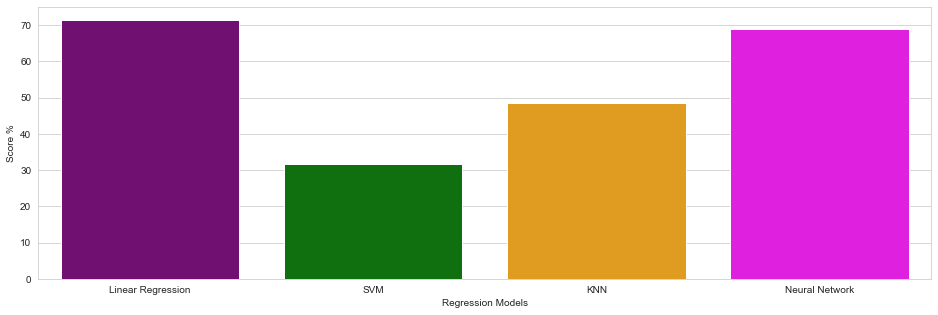

In [67]:
# PLOT THE SCORES FOR REGRESSION MODELS

colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Score %")
plt.xlabel("Regression Models")
sns.barplot(x=list(Scores_B.keys()), y=list(Scores_B.values()), palette=colors)
plt.show()

# Apply Classification Models (B2)

### B2 Without Encoding

In [68]:
products_subsets_model_B

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,average_income
0,1,2,6,7,8,13,14,17,18,19,1896.4706
1,1,2,3,4,8,9,11,15,16,17,1994.9412
2,0,1,3,4,8,9,10,14,15,16,1895.6471
3,2,4,5,7,9,11,14,15,16,19,1889.4706
4,1,2,3,4,5,9,11,15,16,18,1851.7647
...,...,...,...,...,...,...,...,...,...,...,...
18935,0,3,8,10,11,12,13,15,17,19,1811.2941
18936,0,1,2,4,6,8,10,12,17,19,1814.4118
18937,2,4,6,7,11,13,16,17,18,19,1822.7647
18938,1,3,4,9,10,12,15,16,17,19,1780.8235


In [69]:
X = products_subsets_model_B.iloc[:,:-1].values
y = products_subsets_model_B.iloc[:,-1].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [71]:
mean_train_income = y_train.mean()
mean_train_income

1842.9556843453008

In [72]:
trainset_labels = (y_train > mean_train_income).astype(int)
testset_labels = (y_test > mean_train_income).astype(int)

In [73]:
y_train = trainset_labels

In [74]:
y_test = testset_labels

### SVM

In [75]:
svm = SVC(kernel='linear', random_state = 0)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [76]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 61.56282998944034


### Logistic Regression

In [77]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_pred = logisticRegr.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 61.56282998944034


### KNN

In [79]:
KNN = KNeighborsClassifier(n_neighbors = 5) 
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 70.77613516367475


### B2 With Encode (get_dummies)

In [81]:
encoded_B = pd.get_dummies(products_subsets_model_B, columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
encoded_B

,average_income,p1_0,p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,...,p10_10,p10_11,p10_12,p10_13,p10_14,p10_15,p10_16,p10_17,p10_18,p10_19
0,1896.4706,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1994.9412,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1895.6471,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1889.4706,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1851.7647,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,1811.2941,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18936,1814.4118,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18937,1822.7647,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18938,1780.8235,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
X = encoded_B.iloc[:,1:].values
y = encoded_B.iloc[:,0].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [84]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15152, 108) (3788, 108) (15152,) (3788,)


In [85]:
mean_train_income = y_train.mean()
mean_train_income

1842.9556843453008

In [86]:
trainset_labels = (y_train > mean_train_income).astype(int)
testset_labels = (y_test > mean_train_income).astype(int)
print(trainset_labels.shape, testset_labels.shape)

(15152,) (3788,)


In [87]:
y_train = trainset_labels
y_test = testset_labels

### SVM

In [88]:
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)  # connect model with data

SVC(kernel='linear', random_state=0)

In [89]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 81.59978880675818


### Logistic Regression

In [90]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
y_pred = logisticRegr.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 81.44139387539599


### KNN

In [92]:
KNN = KNeighborsClassifier(n_neighbors = 5) 
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"The accuracy is: {acc}")

The accuracy is: 72.3336853220697
